In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents')
jovian.set_colab_id('1-OJ_bT6HGLXCrC58siGA9p9yvJp5es0q')

     |████████████████████████████████| 71kB 3.9MB/s 


# us-accidents  

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidents")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/sr-adarsh3696/us-accidents


'https://jovian.ai/sr-adarsh3696/us-accidents'

# US Accidents Data Analysis
  - This data set does not contain the data about New-York


## Download the Data 

In [5]:
pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

download_url='https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adarsh3696
Your Kaggle Key: ··········


  2%|▏         | 5.00M/299M [00:00<00:08, 36.8MB/s]

100%|██████████| 299M/299M [00:04<00:00, 76.9MB/s]


In [7]:
data_filename = './us-accidents/US_Accidents_Dec20.csv'

## Data Preparation and Cleaning
  - Load the data file using pandas
  - Look at the some information about the data & columns
  - Fix any missing or incorrect values in the file


In [8]:
import pandas as pd

In [9]:
df = pd.read_csv(data_filename)

In [10]:
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [12]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [13]:
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numeric)
len(numeric_df.columns)

15

In [14]:
df.isna().sum().sort_values(ascending=False) ## here we have sorted the missing values

End_Lat                  2716477
End_Lng                  2716477
Number                   2687949
Precipitation(in)        2065589
Wind_Chill(F)            1896001
TMC                      1516064
Wind_Speed(mph)           479326
Visibility(mi)             98668
Weather_Condition          98383
Humidity(%)                95467
Temperature(F)             89900
Wind_Direction             83611
Pressure(in)               76384
Weather_Timestamp          62644
Airport_Code                8973
Timezone                    4615
Zipcode                     1292
Nautical_Twilight            141
Astronomical_Twilight        141
Civil_Twilight               141
Sunrise_Sunset               141
City                         137
Description                    2
Amenity                        0
Street                         0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng 

In [15]:
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentage

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
Amenity                  0.000000e+00
Street                   0.000000e+00
Source                   0.000000e+00
Severity    

In [16]:
missing_percentage[missing_percentage != 0] # here we removing the all columns wuth zero missing values

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
dtype: float64

In [17]:
type(missing_percentage) # type helps us to select the graph

pandas.core.series.Series

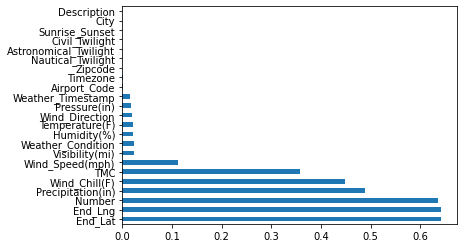

In [18]:
missing_percentage[missing_percentage !=0].plot(kind='barh')

## Exploratory Analysis and Visualization
#### Here we will not be exploring all the columns, we will be going throught only with the columns which are relavent 
  - City
  - Start time
  - Start Lat, Start Lng
  - Temperature
  - Weather Condition


In [19]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [20]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
4232536       Riverside
4232537       San Diego
4232538          Orange
4232539     Culver City
4232540        Highland
Name: City, Length: 4232541, dtype: object

In [21]:
cities = df.City.unique()
len(cities)

12251

In [22]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Houston         114905
Los Angeles      92701
Charlotte        88887
Dallas           77303
Austin           70538
                 ...  
Maple Rapids         1
Sundance             1
Eastview             1
Ponca                1
Elsie                1
Name: City, Length: 12250, dtype: int64

In [23]:
cities_by_accident[:20]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

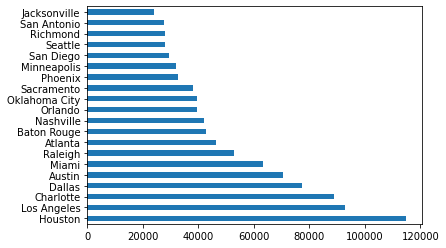

In [24]:
cities_by_accident[:20].plot(kind='barh')

In [25]:
import seaborn as sns
sns.set_style("darkgrid")

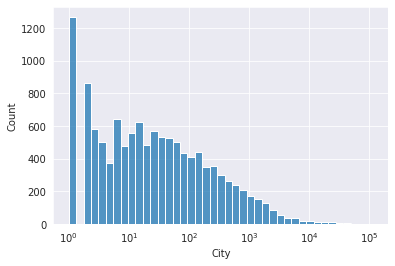

In [26]:
sns.histplot(cities_by_accident, log_scale=True)

In [27]:
high_accident_cities = cities_by_accident[cities_by_accident > 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [28]:
len(high_accident_cities)/len(cities)

0.057383070769733084

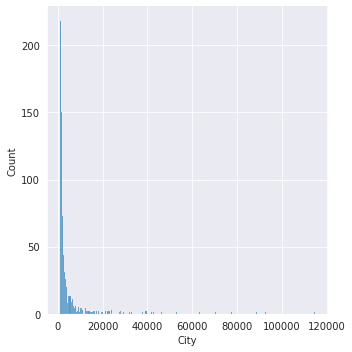

In [29]:
sns.displot(high_accident_cities)

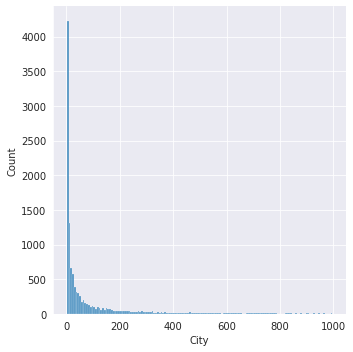

In [30]:
sns.displot(low_accident_cities)

In [31]:
cities_by_accident[cities_by_accident == 1]

Coburn Gore     1
Clinchco        1
Hurdsfield      1
Foxworth        1
Heart Butte     1
               ..
Maple Rapids    1
Sundance        1
Eastview        1
Ponca           1
Elsie           1
Name: City, Length: 1267, dtype: int64

# Start Time

In [32]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
4232536    2019-08-23 18:03:25
4232537    2019-08-23 19:11:30
4232538    2019-08-23 19:00:21
4232539    2019-08-23 19:00:21
4232540    2019-08-23 18:52:06
Name: Start_Time, Length: 4232541, dtype: object

In [33]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [34]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
4232536   2019-08-23 18:03:25
4232537   2019-08-23 19:11:30
4232538   2019-08-23 19:00:21
4232539   2019-08-23 19:00:21
4232540   2019-08-23 18:52:06
Name: Start_Time, Length: 4232541, dtype: datetime64[ns]

In [35]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

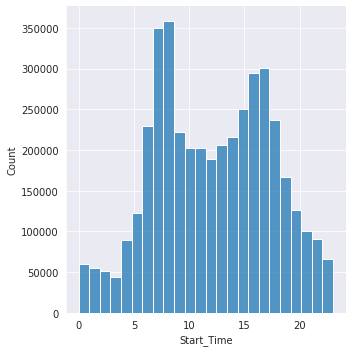

In [36]:
sns.displot(df.Start_Time.dt.hour, bins=24, kde=False)

- Here you can see that most accidents happen between 6am to 9am and 3pm to 5pm (may be people are hurry or due to traffic)

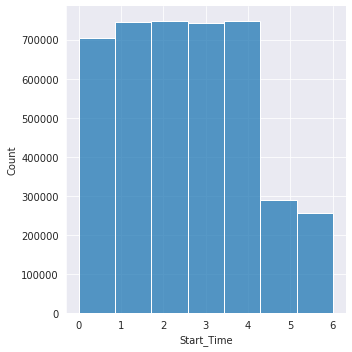

In [37]:
sns.displot(df.Start_Time.dt.dayofweek, bins=7, kde=False)

- Here in the above we have found the accidents as per week so, as you can see that on weekends the accidents are less as compared to weekdays
- Now we will look at the distribution of accidents as per the hour on both weekends and weekdays

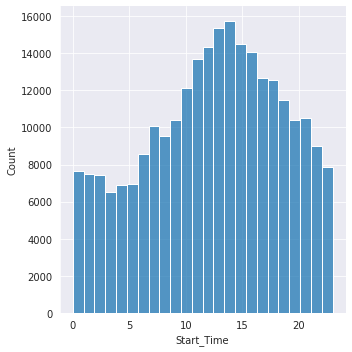

In [38]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.displot(sundays_start_time.dt.hour, bins=24, kde=False)

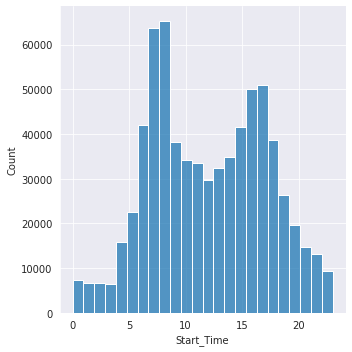

In [39]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.displot(mondays_start_time.dt.hour, bins=24, kde=False)

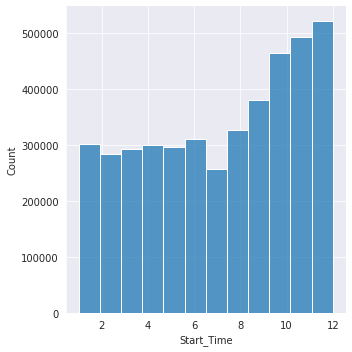

In [40]:
sns.displot(df.Start_Time.dt.month, bins=12, kde=False)

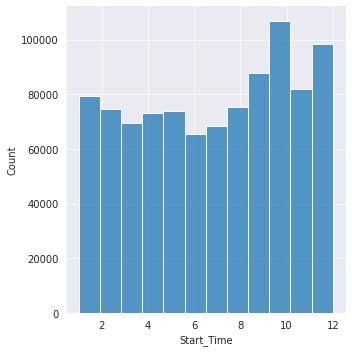

In [41]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.displot(df_2019.Start_Time.dt.month, bins=12, kde=False)

Can you explain the trend of accidents ?

  - Much data is missing from 20106 and also from 2017
  - There seems to be some issue with the Bing data

In [42]:
df.Source

0          MapQuest
1          MapQuest
2          MapQuest
3          MapQuest
4          MapQuest
             ...   
4232536        Bing
4232537        Bing
4232538        Bing
4232539        Bing
4232540        Bing
Name: Source, Length: 4232541, dtype: object

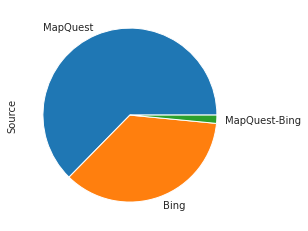

In [43]:
df.Source.value_counts().plot(kind='pie')

Consider excluding Bing data, seems to have some issue 

### Start Lat and Start Lng

In [44]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [45]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

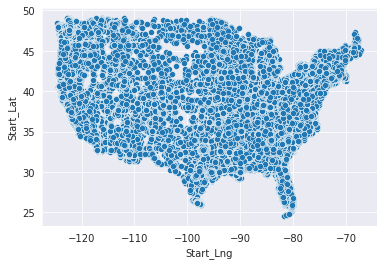

In [46]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

In [47]:
import folium

In [48]:
lat, lng = df.Start_Lat[0], df.Start_Lng[0]
lat, lng

(39.865147, -84.058723)

In [49]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
  print(x)

('Start_Lat', 1118863    30.392981
1470897    29.725794
1331500    42.081032
3750529    33.877011
3584616    35.785170
             ...    
1402943    30.199150
3733389    37.668957
1813380    40.932594
2414479    35.522224
3943747    46.235060
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 1118863    -97.935471
1470897    -95.484032
1331500    -88.333519
3750529   -118.133952
3584616    -78.721690
              ...    
1402943    -92.026627
3733389   -122.109386
1813380    -73.870956
2414479    -97.578964
3943747   -123.871960
Name: Start_Lng, Length: 100, dtype: float64)


In [50]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [51]:
from folium.plugins import HeatMap

In [56]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lng_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [57]:
map=folium.Map()
HeatMap(lat_lng_pairs).add_to(map)
map

## Ask & Answer the Question
  1. Are ther more accidents in warmer or in colder area?
  2. Which 5 state has the highest no. of accidents/ as per there capita ?
  3. which are the top 100 accidental cities, and which state do tehy belong too.
  4. Does New-York show his data, if yes then why its count is low though it has more population
  5. What time of the day this accidents frequently happen ? -> Answers
  6. which months has the more accidents ?
  7. what is the trend of the accidents happen over the year? (Des/Aces)
  8. When is accident per unit of traffic the highest ?



## Summary and Conclusion
  - No data for New-York
  - Less than 5% of cities have more than 1000 accidents
  - More than 1200 cities have reported only 1 accidents
  - The no. of accidents decrease exponentially